In [1]:
# librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


### 1. EDA

In [2]:
#Cargar el dataset
directorio = 'iris.csv'

#Cargar con pandas
df  = pd.read_csv(directorio)

#Vista general del dataframe
print(df.info())

#Imprimir primeras filas
print(df.head())

#Mostrar una descripción básica
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

<Axes: >

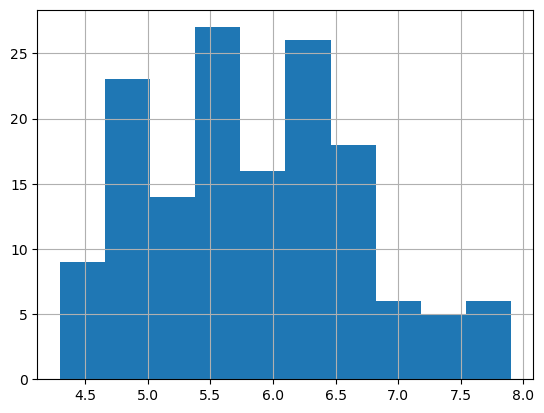

In [3]:
#Histograma
df['sepal.length'].hist()

### Interpretación gráfica

Diferencia entre variables:
Variable sin codificar: ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Ve

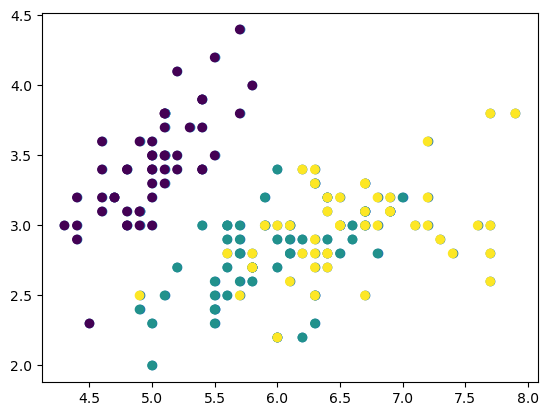

In [4]:
data = df.to_numpy()
X = data[:,0:2]
y = data[:,-1]
# Graficar
plt.scatter(X[:,0], X[:,1])

# #Convertir datos categóricos(texto) a categóricos(numéricos)
# #Setosa     ->  1   [0 0 1]
# #Virginica  ->  2   [0 1 0]
# #Versicolor ->  3   [1 0 0]

# Temperatura ambiente = 10 - 25           -> 10.00001 12.4575 25.0000 ("Continua")
# Calificación = 1 al 5                    -> 1 2 3 4 5 ("Categórico") 

# Codificar
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_codif = encoder.fit_transform(y)

print("Diferencia entre variables:")
print(f'Variable sin codificar: {y}')
print(f'Variable codificada: {y_codif}')

# Graficar con clases
plt.scatter(X[:,0], X[:,1], c = y_codif)

### Crear el conjunto de entrenamiento y validación
Usualmente: 
80% Entrenamiento
20% Validación

X = [0 1 2 3 4 5 6 7 8 9]
X_train = [0 1 2 3 4 5 6 7] 

### Dividir nuestro conjunto de datos

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_codif, test_size=0.2, random_state=42)

### Generar nuestro modelo de aprendizaje

In [6]:
modelo = DecisionTreeClassifier()
#Entrenar el modelo
modelo.fit(X_train, y_train)
#Predicción sobre el conjunto de validación
y_pred = modelo.predict(X_test)

print(f'y real (ground truth):{y_test}')
print(f'y predicha (algoritmo): {y_pred}')

from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print(f'La exactitud del modelo es: {exactitud}')

y real (ground truth):[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
y predicha (algoritmo): [1 0 2 2 2 0 1 1 1 2 1 0 1 0 0 2 2 2 1 2 0 1 0 2 2 1 1 2 0 0]
La exactitud del modelo es: 0.6333333333333333


### Ajustar el modelo (Sintonización)

In [23]:
resultado = []

# Entrenar y evaluar árboles de decisión con diferentes hiperparámetros
for max_depth in [1, 2, 3, 4, 5, None]:
    for min_samples_split in [2, 10, 20]:
        for min_samples_leaf in [1, 5, 10]:
            for ccp_alpha in [0.0, 0.01, 0.02]:
                clf = DecisionTreeClassifier(max_depth=max_depth,
                                             min_samples_split=min_samples_split,
                                             min_samples_leaf=min_samples_leaf,
                                             ccp_alpha=ccp_alpha,
                                             random_state=42)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                resultado.append((max_depth, min_samples_split, min_samples_leaf, ccp_alpha))

# Imprimir el mejor resultado
mejores_parametros = max(resultado, key=lambda item: item[-1])
print("Mejor configuración de hiperparámetros:")
print(f"Profundidad máxima: {mejores_parametros[0]}")
print(f"Min muestras para dividir: {mejores_parametros[1]}")
print(f"Min muestras en nodo hoja: {mejores_parametros[2]}")
print(f"Alpha de complejidad de costo: {mejores_parametros[3]}")



Mejor configuración de hiperparámetros:
Profundidad máxima: 1
Min muestras para dividir: 2
Min muestras en nodo hoja: 1
Alpha de complejidad de costo: 0.02


### Entrenar al modelo con los mejores parámetros

In [26]:
mejor_modelo = DecisionTreeClassifier(max_depth=mejores_parametros[0],
                                  min_samples_split=mejores_parametros[1],
                                  min_samples_leaf=mejores_parametros[2],
                                  ccp_alpha=mejores_parametros[3],
                                  random_state=42)

mejor_modelo.fit(X_train, y_train)
# Validar nuestro mejor modelo
m_exactitud = accuracy_score(y_test, y_pred)
print(f'El mejor modelo tuvo una exactitud de:{m_exactitud:.2f}')

El mejor modelo tuvo una exactitud de:0.80
